# Initial Cleaning/ setup procedures


#### _1. Import libraries and set path to pkl file_

In [1]:
import pandas as pd
import os
from datetime import date, timedelta
import datetime
import numpy as np
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.statespace.sarimax import SARIMAX
# grid search sarima hyperparameters for monthly mean temp dataset
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from sklearn.metrics import mean_squared_error
ROOT_DIR = os.path.realpath(os.path.join(os.getcwd(), '..'))
pkl_loc = os.path.join(ROOT_DIR, 'data', 'data','weatherAA.pkl')
pkl_loc

'C:\\Users\\paull\\OneDrive - Scandinavian Tobacco Group A S\\Documents\\GitHub\\Weatherman\\data\\data\\weatherAA.pkl'

### _2. Create dataframe and run basic eda_

In [86]:
df = pd.read_pickle(pkl_loc)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 146330 entries, 2006-01-01 00:00:00 to 2022-10-07 00:00:00
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    145799 non-null  float64
 1   dwpt    145582 non-null  float64
 2   rhum    145582 non-null  float64
 3   prcp    133375 non-null  float64
 4   snow    0 non-null       float64
 5   wdir    122688 non-null  float64
 6   wspd    145397 non-null  float64
 7   wpgt    0 non-null       float64
 8   pres    141933 non-null  float64
 9   tsun    0 non-null       float64
 10  coco    6519 non-null    float64
dtypes: float64(11)
memory usage: 13.4 MB


,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2006-01-01 00:00:00,1.000,-1.100,86.000,NaN,NaN,240.000,14.800,NaN,NaN,NaN,NaN
2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,NaN,240.000,14.800,NaN,1009.000,NaN,NaN
2006-01-01 02:00:00,0.600,0.000,96.000,NaN,NaN,250.000,13.000,NaN,1009.500,NaN,NaN
2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,NaN,250.000,13.000,NaN,1009.600,NaN,NaN
2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,NaN,250.000,14.800,NaN,1010.500,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-06 00:00:00,13.700,5.100,56.000,NaN,NaN,127.000,8.300,NaN,1022.500,NaN,NaN
2022-10-06 06:00:00,8.800,7.200,90.000,NaN,NaN,245.000,8.300,NaN,1023.300,NaN,NaN
2022-10-06 12:00:00,7.600,6.400,92.000,NaN,NaN,272.000,6.500,NaN,1024.600,NaN,NaN


In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,145799.000,145582.000,145582.000,133375.000,0.000,122688.000,145397.000,0.000,141933.000,0.000,6519.000
mean,9.490,4.209,72.401,0.084,NaN,199.981,11.874,NaN,1016.638,NaN,5.066
std,11.203,10.452,18.049,0.572,NaN,101.271,8.347,NaN,7.472,NaN,3.523
min,-32.200,-34.900,15.000,0.000,NaN,0.000,0.000,NaN,980.300,NaN,1.000
25%,0.600,-3.900,60.000,0.000,NaN,120.000,5.400,NaN,1012.100,NaN,3.000
50%,10.000,4.400,75.000,0.000,NaN,220.000,11.200,NaN,1016.500,NaN,5.000
75%,18.900,13.200,87.000,0.000,NaN,280.000,16.600,NaN,1021.300,NaN,5.000
max,38.900,27.100,100.000,34.300,NaN,360.000,63.000,NaN,1045.800,NaN,26.000


In [4]:
df.shape

(146330, 11)

### _3. Remove unneeded columns_


In [5]:
df.drop(columns=['snow', 'wpgt','tsun','coco'],inplace=True)
df.head()

,temp,dwpt,rhum,prcp,wdir,wspd,pres
time,,,,,,,
2006-01-01 00:00:00,1.000,-1.100,86.000,NaN,240.000,14.800,NaN
2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500


In [6]:
df.reset_index(inplace=True)

### _5. Difference in Time_

In [7]:
df=df[df['time']<'2022-09-22 23:00:00'] #matching end of existing data
dftime=df.copy(deep=True)

In [8]:
dftime['timediff']=dftime['time'].diff(periods=1) #difference for hours

In [9]:
dftime['timediff']=dftime['timediff']/pd.Timedelta(hours=1) #converted to hour int

In [10]:

dftime[dftime['timediff']>10]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
2355,2006-04-10 17:00:00,13.900,1.200,42.000,0.000,180.000,13.000,NaN,38.000
6893,2006-10-18 06:00:00,11.100,9.400,89.000,NaN,220.000,11.200,NaN,27.000
38008,2010-05-09 20:00:00,12.200,-3.200,34.000,0.000,280.000,20.500,NaN,29.000
38663,2010-06-06 20:00:00,19.400,12.200,63.000,0.000,280.000,13.000,1007.000,18.000
39795,2010-07-24 21:00:00,29.400,20.600,59.000,0.000,300.000,20.500,1010.600,22.000
56859,2012-07-06 18:00:00,36.100,21.200,42.000,NaN,NaN,0.000,1013.700,33.000
56866,2012-07-07 12:00:00,30.000,22.200,63.000,0.000,260.000,11.200,1012.000,12.000
61586,2013-01-20 20:00:00,-5.600,-14.900,48.000,0.000,300.000,25.900,NaN,14.000
73919,2014-06-19 12:00:00,19.400,17.700,90.000,0.000,30.000,11.200,NaN,16.000
75804,2014-09-08 15:00:00,21.700,11.700,53.000,0.000,100.000,14.800,NaN,63.000


### _6. Null and Precep Count_

In [11]:
dftime[dftime['timediff']>1]

#lot of null for prcp


,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
119,2006-01-06 00:00:00,0.600,-3.300,75.000,0.000,340.000,22.300,NaN,2.000
2355,2006-04-10 17:00:00,13.900,1.200,42.000,0.000,180.000,13.000,NaN,38.000
4538,2006-07-10 19:00:00,26.100,12.900,44.000,0.000,290.000,16.600,1013.200,4.000
4571,2006-07-12 07:00:00,22.800,21.800,94.000,0.000,230.000,18.400,1011.200,4.000
5081,2006-08-02 15:00:00,30.000,23.900,70.000,0.000,220.000,20.500,1010.900,3.000
...,...,...,...,...,...,...,...,...,...
129864,2020-11-13 04:00:00,NaN,NaN,NaN,0.000,NaN,NaN,NaN,13.000
130173,2020-11-26 12:00:00,11.000,10.100,94.000,NaN,280.000,19.000,NaN,12.000
130177,2020-11-26 17:00:00,10.000,8.100,88.000,NaN,270.000,19.000,NaN,2.000
130181,2020-11-26 22:00:00,NaN,NaN,NaN,0.000,NaN,NaN,NaN,2.000


In [12]:
dftime[dftime["prcp"]>0]

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,timediff
26,2006-01-02 02:00:00,1.100,-1.100,85.000,0.300,NaN,11.200,1015.400,1.000
27,2006-01-02 03:00:00,1.100,-0.100,92.000,0.800,80.000,14.800,1015.100,1.000
29,2006-01-02 05:00:00,1.700,0.500,92.000,0.500,80.000,18.400,1014.200,1.000
30,2006-01-02 06:00:00,1.700,1.100,96.000,1.800,80.000,16.600,1013.800,1.000
31,2006-01-02 07:00:00,1.700,1.100,96.000,0.500,70.000,14.800,1013.500,1.000
...,...,...,...,...,...,...,...,...,...
146010,2022-09-17 21:00:00,27.800,15.500,47.000,0.100,250.000,16.600,1016.800,1.000
146048,2022-09-19 11:00:00,17.200,16.100,93.000,3.000,280.000,7.600,1012.100,1.000
146091,2022-09-21 06:00:00,17.000,15.300,90.000,1.100,200.000,11.000,1013.000,1.000
146092,2022-09-21 07:00:00,18.000,15.800,87.000,5.000,210.000,15.000,1012.000,1.000


In [13]:
#cln_pkl_loc = os.path.join(ROOT_DIR, 'data_cleaning','cleanweathersmall.pkl')
#df.to_pickle(cln_pkl_loc)


### _6. Merging in new time_

In [14]:
time_range = pd.date_range('2006-01-01 00:00:00', '2022-09-22 23:00:00', freq='H') ##creating time range

In [15]:
df_time=pd.DataFrame(time_range)

In [16]:
df_time.columns =['time']

In [17]:
df

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2006-01-01 00:00:00,1.000,-1.100,86.000,NaN,240.000,14.800,NaN
1,2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2,2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
3,2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
4,2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500
...,...,...,...,...,...,...,...,...
146127,2022-09-22 18:00:00,16.000,4.400,46.000,0.000,340.000,20.000,1017.000
146128,2022-09-22 19:00:00,15.000,3.500,46.000,0.000,320.000,25.900,1017.600
146129,2022-09-22 20:00:00,16.100,4.500,46.000,0.000,320.000,18.400,1017.900
146130,2022-09-22 21:00:00,16.000,4.400,46.000,0.000,330.000,22.000,1019.000


In [18]:
df_time

,time
0,2006-01-01 00:00:00
1,2006-01-01 01:00:00
2,2006-01-01 02:00:00
3,2006-01-01 03:00:00
4,2006-01-01 04:00:00
...,...
146611,2022-09-22 19:00:00
146612,2022-09-22 20:00:00
146613,2022-09-22 21:00:00
146614,2022-09-22 22:00:00


In [19]:
df_updated=df_time.merge(df,left_on=['time'], right_on=['time'], how='left') #new df with nulls 

In [20]:
df_updated

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
0,2006-01-01 00:00:00,1.000,-1.100,86.000,NaN,240.000,14.800,NaN
1,2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2,2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
3,2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
4,2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500
...,...,...,...,...,...,...,...,...
146611,2022-09-22 19:00:00,15.000,3.500,46.000,0.000,320.000,25.900,1017.600
146612,2022-09-22 20:00:00,16.100,4.500,46.000,0.000,320.000,18.400,1017.900
146613,2022-09-22 21:00:00,16.000,4.400,46.000,0.000,330.000,22.000,1019.000
146614,2022-09-22 22:00:00,14.000,2.900,47.000,0.000,330.000,22.000,1019.000


### _7. Inputting missing values_

In [21]:
#dfinputt=df.drop(['station', 'time'], axis=1)
#dfinputt

In [22]:
#imputer = KNNImputer(missing_values=np.nan,n_neighbors=5)
#imputer.fit_transform(dfinputt)  I have decided KNN just isn't the best approach.  Its slow and this is time series data, it doesn't need to scan the entire dataframe looking for neighbors, we know what the "neighbors" are

In [23]:
df_updated.set_index('time', inplace=True)

In [24]:
df_updated

,temp,dwpt,rhum,prcp,wdir,wspd,pres
time,,,,,,,
2006-01-01 00:00:00,1.000,-1.100,86.000,NaN,240.000,14.800,NaN
2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500
...,...,...,...,...,...,...,...
2022-09-22 19:00:00,15.000,3.500,46.000,0.000,320.000,25.900,1017.600
2022-09-22 20:00:00,16.100,4.500,46.000,0.000,320.000,18.400,1017.900
2022-09-22 21:00:00,16.000,4.400,46.000,0.000,330.000,22.000,1019.000


In [25]:
dfint=df_updated.copy(deep=True)
#dfint=dfint.set_index('station')
#for column in dfint:
#        dfint[column]=dfint[column].interpolate(method='polynomial', order=2)
dfint['temp']=dfint['temp'].interpolate(method='polynomial', order=5)

In [26]:
dfint.drop(index=('2022-09-22 23:00:00'), inplace=True)
dfint.drop(index=('2006-01-01 00:00:00'), inplace=True)
dfint

,temp,dwpt,rhum,prcp,wdir,wspd,pres
time,,,,,,,
2006-01-01 01:00:00,1.100,-0.100,92.000,0.000,240.000,14.800,1009.000
2006-01-01 02:00:00,0.600,0.000,96.000,NaN,250.000,13.000,1009.500
2006-01-01 03:00:00,1.100,-0.100,92.000,NaN,250.000,13.000,1009.600
2006-01-01 04:00:00,1.100,-0.700,88.000,NaN,250.000,14.800,1010.500
2006-01-01 05:00:00,1.100,-0.100,92.000,0.000,240.000,16.600,1010.900
...,...,...,...,...,...,...,...
2022-09-22 18:00:00,16.000,4.400,46.000,0.000,340.000,20.000,1017.000
2022-09-22 19:00:00,15.000,3.500,46.000,0.000,320.000,25.900,1017.600
2022-09-22 20:00:00,16.100,4.500,46.000,0.000,320.000,18.400,1017.900


In [27]:
dfint.reset_index(inplace=True)
dfint[(dfint['time']>='2014-09-06') & (df['time']<='2014-09-08')].head(50)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres


In [28]:
dfint[(dfint['time']>='2006-04-09 00:00:00') & (dfint['time']<='2006-04-10 23:00:00')].head(60)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres
2351,2006-04-09 00:00:00,4.400,-5.100,50.000,0.000,330.000,16.600,1022.200
2352,2006-04-09 01:00:00,3.300,-4.900,55.000,0.000,340.000,11.200,1023.000
2353,2006-04-09 02:00:00,0.000,-3.900,75.000,0.000,NaN,0.000,1023.700
2354,2006-04-09 03:00:00,-2.200,-4.400,85.000,0.000,260.000,5.400,1023.600
2355,2006-04-09 04:00:00,-1.552,NaN,NaN,NaN,NaN,NaN,NaN
2356,2006-04-09 05:00:00,1.378,NaN,NaN,NaN,NaN,NaN,NaN
2357,2006-04-09 06:00:00,5.996,NaN,NaN,NaN,NaN,NaN,NaN
2358,2006-04-09 07:00:00,11.778,NaN,NaN,NaN,NaN,NaN,NaN
2359,2006-04-09 08:00:00,18.266,NaN,NaN,NaN,NaN,NaN,NaN
2360,2006-04-09 09:00:00,25.065,NaN,NaN,NaN,NaN,NaN,NaN


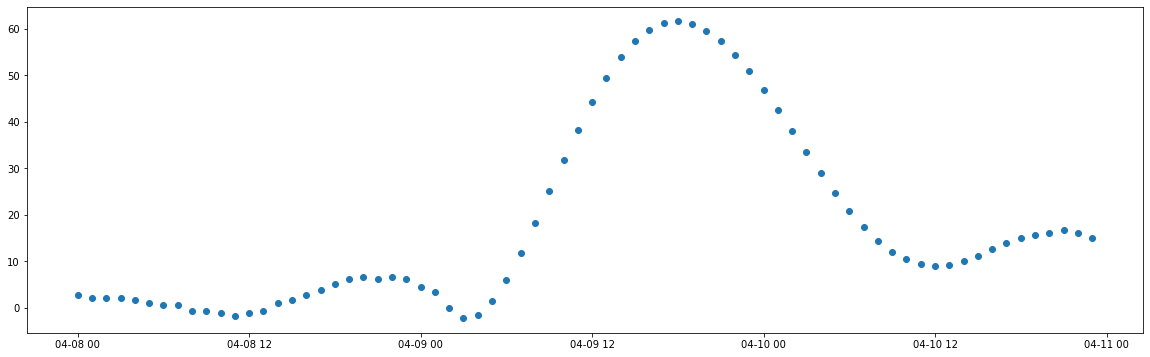

In [29]:

dfgraph=dfint[(dfint['time']>='2006-04-08 00:00:00') & (dfint['time']<='2006-04-10 23:00:00')]
x= dfgraph['time']
y= dfgraph['temp']

figure(figsize=(20,6))
plt.scatter(x,y)
plt.show()


In [30]:
cln_pkl_loc = os.path.join(ROOT_DIR, 'data','AAcleaned.pkl')
dfint.to_pickle(cln_pkl_loc)


In [31]:
#testing spline, actually I don't like it - the numbers are too smooth.  

#test2=dfint2[dfint2['station']=='0CNUO']
#for column in test2:
#    if column in ['station', 'time']:
#        None
#    else:
        #print(column)
#        test2[column]=test2[column].interpolate(method='spline', order=3)

In [32]:
#test2[(test2['time']>='2022-05-25 01:00:00') & (test2['time']<'2022-05-27 01:00:00')] 

In [76]:
dfsarima=df[(df['time']>='2006-01-06 00:00:00') & (df['time']<='2006-04-07 03:00:00')]
dfsarima.set_index('time',inplace=True)

In [77]:
import statsmodels.api as sm #[(0, 0, 0), (0, 1, 2, 24)(1, 0, 0), (0, 1, 0, 24)[(2, 0, 2), (0, 1, 0, 24), 't']
mod = sm.tsa.statespace.SARIMAX(dfsarima['temp'], 
                                order = (2,0,2),
                                seasonal_order = (0,1,0,24),
                                trend = 't',
                                enforce_stationarity = False,
                                enforce_invertibility = False)

C:\Users\paull\Anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\paull\Anaconda32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [78]:
res = mod.fit(disp=False)
print(res.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                temp   No. Observations:                 2188
Model:             SARIMAX(2, 0, 2)x(0, 1, [], 24)   Log Likelihood               -3516.932
Date:                             Mon, 10 Oct 2022   AIC                           7045.864
Time:                                     09:28:33   BIC                           7079.934
Sample:                                 01-06-2006   HQIC                          7058.325
                                      - 04-07-2006                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift        1.91e-06   5.59e-06      0.342      0.732   -9.04e-06    1.29e-05
ar.L1          1.7971      

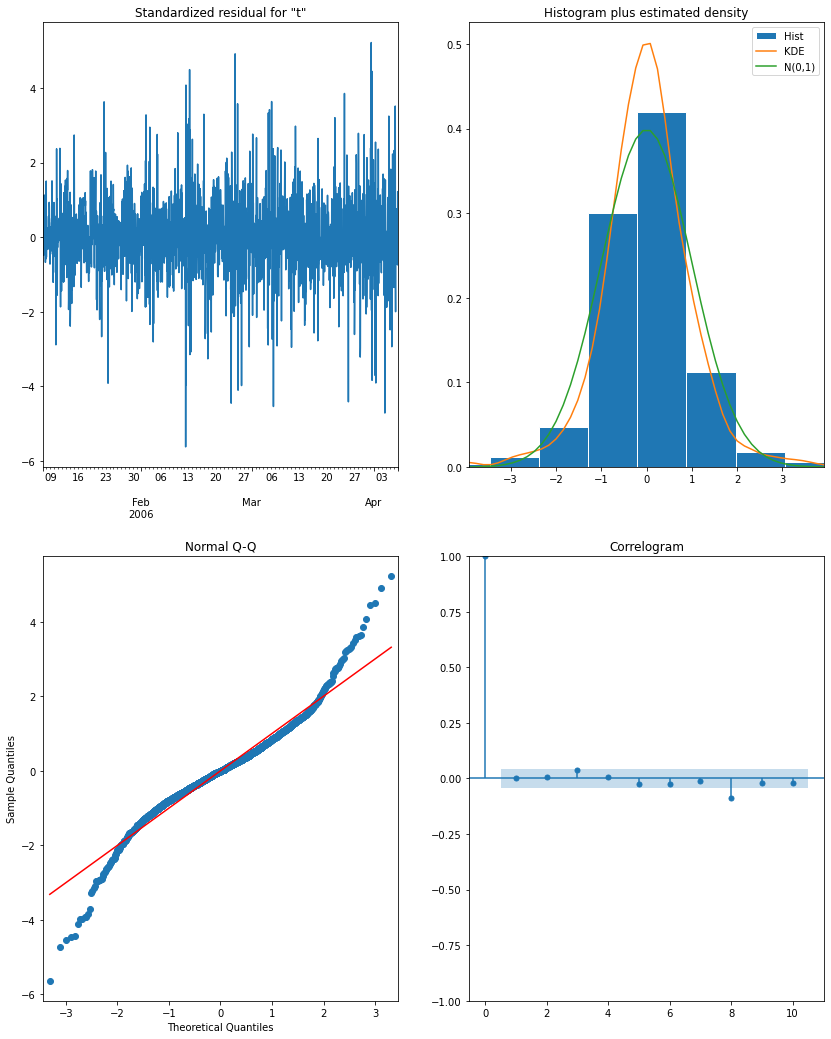

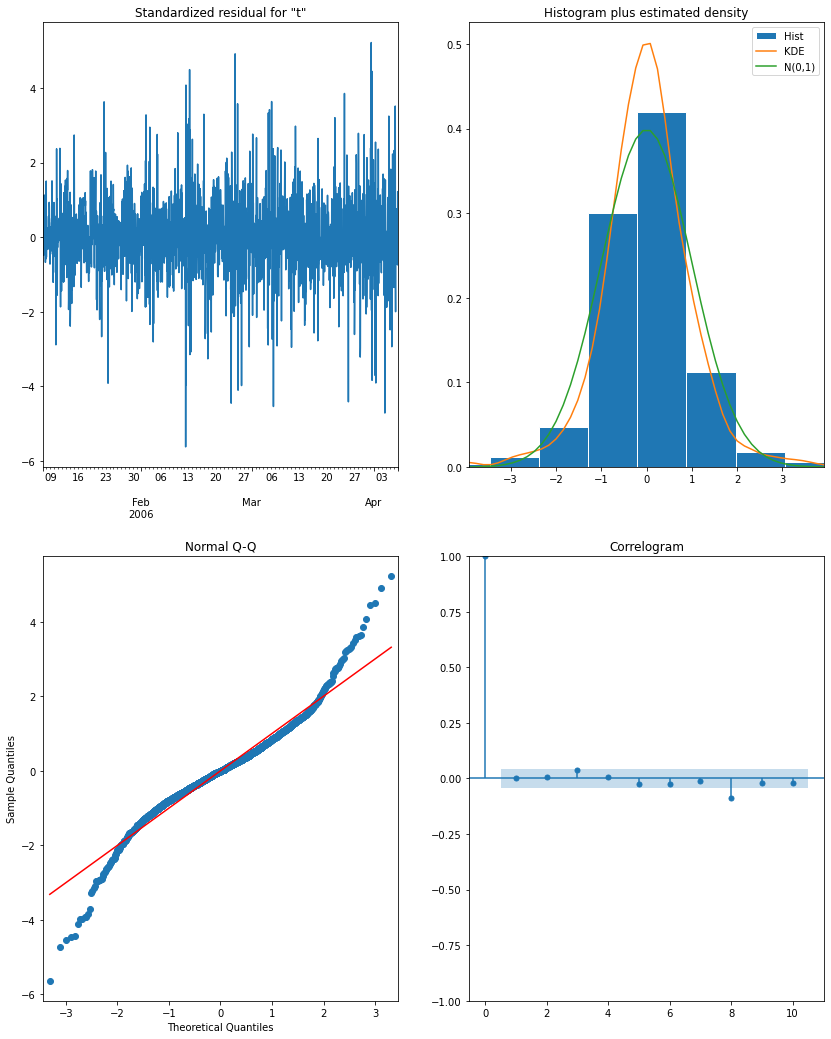

In [79]:
res.plot_diagnostics(figsize=(14,18))

In [80]:
forecast_values = res.get_forecast(steps=37)
pd.DataFrame(forecast_values.predicted_mean)

,predicted_mean
2006-04-07 04:00:00,5.609
2006-04-07 05:00:00,5.101
2006-04-07 06:00:00,4.508
2006-04-07 07:00:00,4.527
2006-04-07 08:00:00,4.555
2006-04-07 09:00:00,1.791
2006-04-07 10:00:00,3.531
2006-04-07 11:00:00,4.075
2006-04-07 12:00:00,4.121
2006-04-07 13:00:00,4.768


In [81]:
df_graph2=df[(df['time']>='2006-04-06 00:00:00') & (df['time']<='2006-04-09 23:00:00')][['time','temp']]
df_graph2.set_index('time',inplace=True)


In [82]:
df_graph2

,temp
time,
2006-04-06 00:00:00,10.600
2006-04-06 01:00:00,8.300
2006-04-06 02:00:00,7.800
2006-04-06 03:00:00,7.200
2006-04-06 04:00:00,6.100
...,...
2006-04-08 23:00:00,6.100
2006-04-09 00:00:00,4.400
2006-04-09 01:00:00,3.300


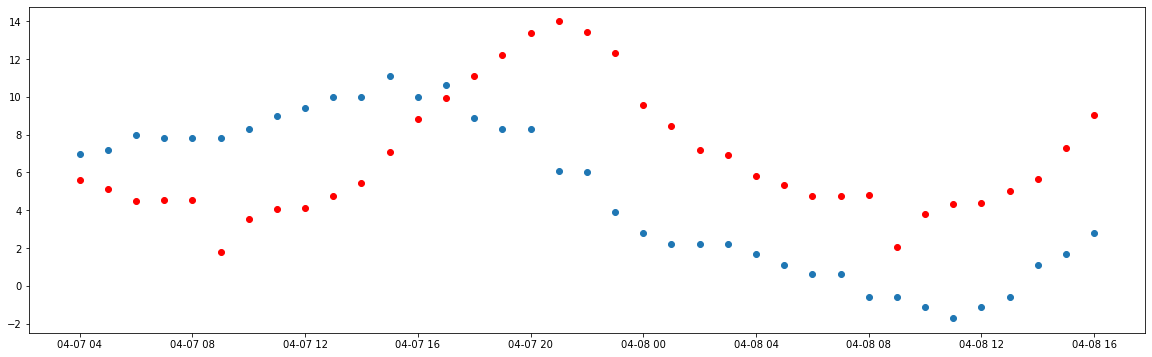

In [83]:
forecast=forecast_values.predicted_mean
forecast.rename('temp', inplace=True)
forecast=pd.DataFrame(forecast)
forecast.reset_index(inplace=True)
#df_graph3=pd.concat([df_graph2,forecast])
df_graph3=forecast#.sort_index(inplace=True)

dfgraph=dfint[(dfint['time']>='2006-04-07 04:00:00') & (dfint['time']<='2006-04-08 16:00:00')]
x= dfgraph['time']
y= dfgraph['temp']
x2=df_graph3['index']
y2=df_graph3['temp']
figure(figsize=(20,6))
plt.scatter(x2,y2,c='r')
plt.scatter(x,y)

#plt.show()

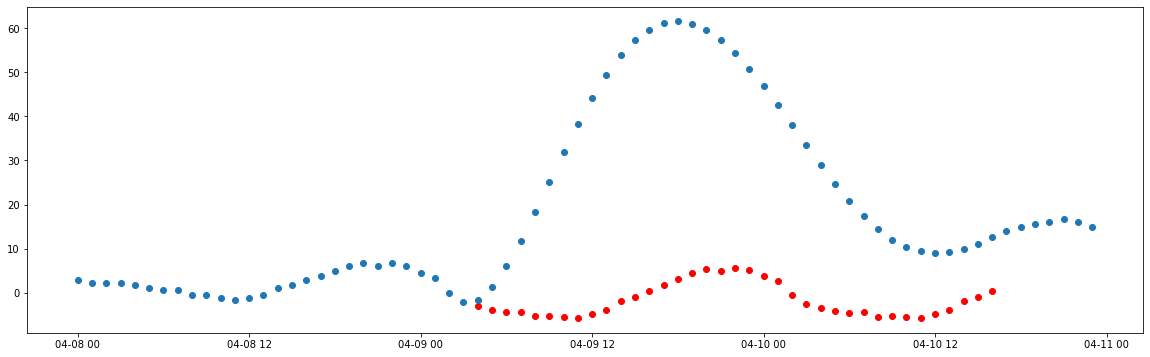

In [75]:
forecast=forecast_values.predicted_mean
forecast.rename('temp', inplace=True)
forecast=pd.DataFrame(forecast)
forecast.reset_index(inplace=True)
#df_graph3=pd.concat([df_graph2,forecast])
df_graph3=forecast#.sort_index(inplace=True)
dfgraph=dfint[(dfint['time']>='2006-04-08 00:00:00') & (dfint['time']<='2006-04-10 23:00:00')]
x= dfgraph['time']
y= dfgraph['temp']
x2=df_graph3['index']
y2=df_graph3['temp']
figure(figsize=(20,6))
plt.scatter(x2,y2,c='r')
plt.scatter(x,y)
plt.show()

In [41]:
sarima_config

NameError: name 'sarima_config' is not defined

In [87]:
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))
 
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]
 
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	#print('starting walk_forward_validation')
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)  
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	#print(error)
	#print('ending grid_search')
	return error
 
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	#print('starting score_model')
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	#print('ending grid_search')
	return (key, result)
 
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=False):
	#print('starting grid_search')
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count())#, backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	#print('ending grid_search')
	return scores
 
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	#print('starting sarima_configs')
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	#print('ending sarima_configs')
	return models
 


In [44]:
if __name__ == '__main__':
	# load dataset
	series = dfint[(dfint['time']>='2006-04-01 00:00:00') & (dfint['time']<='2006-04-07 00:00:00')]['temp']
	data = series.values
	# trim dataset to 5 years
	#data = data[-(5*12):]
	# data split
	n_test = 12
	# model configs
	cfg_list = sarima_configs(seasonal=[0, 24])
	#cfg_list = [[(0, 0, 0), (0, 0, 0, 0), 'n']]
	# grid search
	scores = grid_search(data, cfg_list, n_test)
	print('done')
	#list top 3 configs
	for cfg, error in scores[:3]:
		print(cfg, error)

 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 10.582
 > Model[[(0, 0, 0), (0, 0, 0, 24), 'n']] 10.582
 > Model[[(0, 0, 0), (0, 0, 1, 24), 'n']] 5.866
 > Model[[(0, 0, 0), (0, 0, 2, 24), 'n']] 4.231
 > Model[[(0, 0, 0), (0, 1, 0, 24), 'n']] 1.945
 > Model[[(0, 0, 0), (0, 1, 1, 24), 'n']] 2.959
 > Model[[(0, 0, 0), (0, 1, 2, 24), 'n']] 2.388
 > Model[[(0, 0, 0), (1, 0, 0, 24), 'n']] 3.746
 > Model[[(0, 0, 0), (1, 0, 1, 24), 'n']] 5.456
 > Model[[(0, 0, 0), (1, 0, 2, 24), 'n']] 3.943
 > Model[[(0, 0, 0), (1, 1, 0, 24), 'n']] 2.442
 > Model[[(0, 0, 0), (1, 1, 1, 24), 'n']] 3.305
 > Model[[(0, 0, 0), (1, 1, 2, 24), 'n']] 2.432
 > Model[[(0, 0, 0), (2, 0, 0, 24), 'n']] 4.276
 > Model[[(0, 0, 0), (2, 0, 1, 24), 'n']] 5.296
 > Model[[(0, 0, 0), (2, 0, 2, 24), 'n']] 3.828
 > Model[[(0, 0, 0), (2, 1, 0, 24), 'n']] 2.835
 > Model[[(0, 0, 0), (2, 1, 1, 24), 'n']] 1.459
 > Model[[(0, 0, 0), (2, 1, 2, 24), 'n']] 1.881
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'c']] 4.665
 > Model[[(0, 0, 0), (0, 0, 0, 24), 'c']

In [ ]:
scores